In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

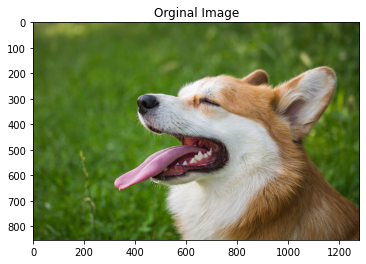

In [2]:
image = cv2.imread(r'C:\Users\DELL\Desktop\python project\open cv2\New folder (5)\dog.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orginal Image')
plt.show()

### Oriented Gradient :

An oriented gradient, in the context of computer vision and image processing, describes the directional and intensity changes within an image. This concept involves representing these changes as vectors at each pixel, where the direction of the vector corresponds to the most significant intensity change's direction, and the vector's magnitude indicates the strength of this change. Typically computed using filters like Sobel or Scharr, oriented gradients are used to capture edge information and patterns in images. These gradients find broad application in computer vision tasks such as object detection, image classification, texture analysis, gesture recognition, lane detection in autonomous vehicles, and biometric identification, as they provide essential structural information for understanding and processing image content.

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
cell_size = (8, 8)
block_size = (2, 2)
nbins = 9

In [5]:
hog = cv2.HOGDescriptor(_winSize = (gray_image.shape[1] // cell_size[1] * cell_size[1],
                                    gray_image.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize = (block_size[1] * cell_size[1],
                                      block_size[0] * cell_size[0]),
                        _blockStride = (cell_size[1], cell_size[0]),
                        _cellSize = (cell_size[1], cell_size[0]),
                        _nbins=nbins)

In [6]:
n_cells = (gray_image.shape[0] // cell_size [0], gray_image.shape[1] // cell_size[1])

In [7]:
hog_feat = hog.compute(gray_image).reshape(n_cells[1] - block_size[1] + 1, 
                                     n_cells[0] - block_size[0] + 1, 
                                     block_size[0], block_size[1], nbins).transpose(1, 0, 2, 3, 4)

In [8]:
gradient = np.zeros((n_cells[0], n_cells[1], nbins))

In [9]:
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype = int)

In [10]:
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradient[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feat[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1


In [11]:
gradient /= cell_count

In [12]:
color_bins = 5

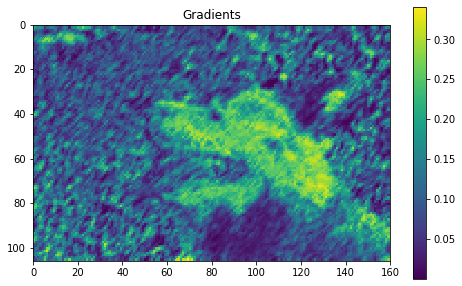

In [13]:
plt.figure(figsize=(8,5))
plt.pcolor(gradient[:, :, color_bins])
plt.title('Gradients')
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
cv2.imwrite('gradients.jpg', gradient[:, :, color_bins])
plt.colorbar()

plt.show()